# Objectifs

- prise en main `scikit-learn`
- suite POO
- biais/variance
- pipeline

# Scikit-learn

In [1]:
import sklearn 

In [2]:
help(sklearn)

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _isotonic
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experimental (package)
    externals (package)
    feature_extraction (p

## Dataset

In [3]:
from sklearn.datasets import load_digits

In [4]:
donnees = load_digits()

In [5]:
dir(donnees)

['DESCR', 'data', 'images', 'target', 'target_names']

In [6]:
print(donnees.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
type(donnees.images)

numpy.ndarray

In [8]:
donnees.images.shape

(1797, 8, 8)

In [9]:
import matplotlib.pyplot as plt

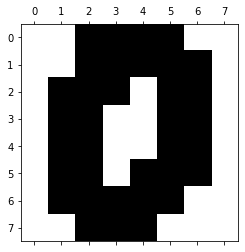

In [10]:
plt.spy(donnees.images[0])

In [11]:
donnees.target[0]

0

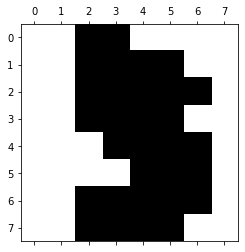

In [12]:
plt.spy(donnees.images[5])

In [13]:
donnees.target[5]

5

In [14]:
donnees.images[5]

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

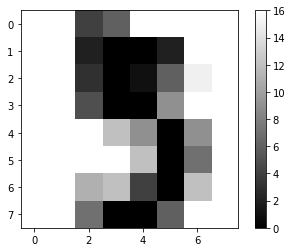

In [15]:
plt.imshow(16 - donnees.images[5], cmap="gray")
plt.colorbar()

# Fit predict

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of th

In [18]:
c = KNeighborsClassifier()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    donnees.data, 
    donnees.target
)

In [21]:
X_train.shape

(1347, 64)

In [22]:
X_test.shape

(450, 64)

In [23]:
c.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
c.predict(X_test)

array([2, 9, 3, 8, 3, 6, 1, 9, 1, 1, 3, 0, 3, 8, 3, 6, 5, 9, 2, 2, 4, 2,
       4, 0, 0, 3, 3, 1, 3, 3, 2, 1, 7, 1, 6, 0, 4, 7, 5, 3, 2, 7, 7, 1,
       1, 0, 8, 3, 6, 5, 1, 1, 6, 2, 3, 2, 3, 9, 7, 8, 4, 4, 4, 9, 9, 7,
       0, 9, 5, 5, 9, 8, 6, 2, 8, 4, 5, 8, 9, 9, 3, 6, 2, 5, 8, 3, 1, 2,
       7, 7, 2, 6, 5, 4, 0, 1, 3, 9, 3, 4, 3, 7, 2, 9, 8, 4, 5, 8, 8, 6,
       7, 9, 0, 5, 2, 0, 3, 8, 0, 4, 3, 7, 5, 6, 5, 6, 5, 0, 1, 0, 8, 6,
       7, 0, 8, 0, 0, 6, 2, 3, 6, 6, 2, 9, 2, 7, 0, 1, 4, 5, 9, 7, 0, 6,
       6, 1, 5, 2, 8, 0, 0, 6, 1, 2, 7, 2, 0, 9, 9, 9, 2, 4, 5, 5, 5, 2,
       4, 4, 1, 1, 0, 6, 5, 5, 0, 2, 1, 0, 3, 9, 7, 3, 5, 5, 6, 6, 0, 1,
       3, 9, 9, 1, 9, 9, 3, 0, 0, 8, 6, 7, 0, 6, 5, 3, 9, 6, 1, 3, 7, 4,
       2, 4, 3, 8, 0, 9, 9, 6, 1, 0, 3, 7, 4, 8, 5, 8, 6, 4, 9, 3, 9, 8,
       5, 8, 2, 1, 3, 4, 6, 4, 2, 4, 0, 8, 3, 2, 2, 8, 4, 9, 1, 1, 2, 6,
       1, 6, 7, 1, 5, 1, 6, 2, 2, 7, 5, 7, 3, 5, 2, 0, 9, 9, 9, 8, 4, 3,
       6, 0, 9, 3, 8, 8, 0, 4, 1, 6, 8, 2, 7, 2, 8,

In [25]:
dir(c)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'outputs_2d_',
 'p',
 'predict',
 'predict_proba',
 'radius',
 'score',
 'set_params',
 'weights']

In [26]:
c.score(X_test, y_test)

0.98

# Exercice

Utiliser scikit-learn pour regarder l'évolution du score d'un modèle polynomial en fonction du degrés pour la fonction cible

$$x\in[-1, 1]\mapsto \exp(-20x^2)$$
on pourra aussi regarder l'évolution en fonction de la taille de l'échantillon.

On fait de la régression linéaire sur les entrées $(x^0, x^1,..., x^d)$ pour générer ce tableau à partir des points de l'échantillon on utilisera soit 
- numpy.stack
- sklearn.preprocessing : PolynomialFeatures

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [28]:
nb_points = 40
a, b = -1, 1

In [29]:
xs = np.random.uniform(low=a, high=b, size=(nb_points))

In [30]:
def cible(x):
    return np.exp(-20 * x ** 2)

In [31]:
y = cible(xs)

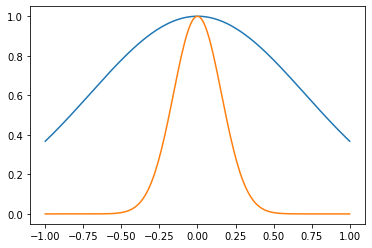

In [32]:
p = np.linspace(-1, 1, 200)
plt.plot(p, np.exp(-p ** 2))
plt.plot(p, np.exp(-20 * p ** 2))

In [33]:
def gen_puissance(xs, degres):
    puissances = [xs ** k for k in range(0, degres + 1)]
    X = np.stack(puissances)
    return X.T
    
entree = np.array([0, 2, 1])
sortie = np.array([[1, 0, 0], [1, 2, 4], [1, 1, 1]])
assert np.allclose(gen_puissance(xs=entree, degres=2), sortie)

In [50]:
def biais_variance(degres):
    X = gen_puissance(xs, degres=degres)
    m = LinearRegression(fit_intercept=False)
    Xtr, Xte, ytr, yte = train_test_split(X, 
                                          y, 
                                          test_size=0.33,
                                          random_state=42
                                         )
    m.fit(Xtr, ytr)
    return m.score(Xtr, ytr), m.score(Xte, yte)

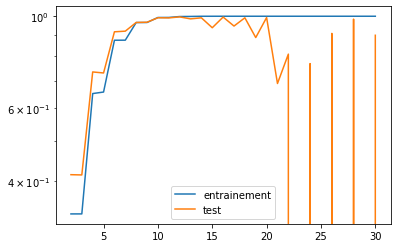

In [51]:
degres = list(range(2, 31))
doubles = [biais_variance(d) for d in degres]
scores_tr = [sc[0] for sc in doubles]
scores_te = [sc[1] for sc in doubles]
plt.semilogy(degres, scores_tr, label="entrainement")
plt.semilogy(degres, scores_te, label="test")
plt.legend()

## Exercice

Visualiser les graphes des modèles appris pour les degrés 4, 8, 12, 16, 20, 24

In [43]:
class Echantillon:
    def __init__(self, nb_points, cible, a, b):
        self._a = a
        self._b = b
        self._nb_points = nb_points
        self.xs = np.random.uniform(
            low=a, 
            high=b, 
            size=(nb_points)            
        )
        self._cible = cible
        self.y = cible(self.xs)
        
    def gen_puissance(self, degres):
        puissances = [self.xs ** k for k in range(0, degres + 1)]
        X = np.stack(puissances)
        return X.T
    
    def affichage(self, repere):
        # repere.scatter(self.xs, self.y)
        x = np.linspace(a, b, 200)
        repere.plot(x, self._cible(x), label="cible")
        

In [60]:
class Modele:
    def __init__(self, echantillon, degres):
        self._ech = echantillon
        self.degres = degres
        self.y = echantillon.y
        self.X = echantillon.gen_puissance(degres)
        self.m = LinearRegression(fit_intercept=False)
        self._Xtr, self._Xte, self._ytr, self._yte = train_test_split(self.X,
                                                                  self.y, 
                                                                  test_size=0.33, 
                                                                  random_state=42
                                                                 )
        self.m.fit(self._Xtr, self._ytr)
        
    def score_test(self):
        return self.m.score(self._Xte, self._yte)
    
    def score_train(self):
        return self.m.score(self._Xtr, self._ytr)
    
    def predict(self, x):
        puissances = [x ** k for k in range(0, self.degres + 1)]
        X = np.stack(puissances).T
        return  self.m.predict(X)
    
    def affichage(self, repere):
        x = np.linspace(self._ech._a, self._ech._b, 200)
        repere.scatter(self._Xtr[:,1], self._ytr, color="blue", label="entrainement")
        repere.scatter(self._Xte[:,1], self._yte, color="red", label="test")

        repere.plot(x, self.predict(x), label=f"d={self.degres}")
        

In [61]:
ech = Echantillon(45, 
                  lambda x: np.exp(-20 * x ** 2),
                  a = -1, 
                  b = 1
                 )

In [65]:
degres = list(range(3, 33, 3))
modeles = [Modele(ech, d) for d in degres]
    

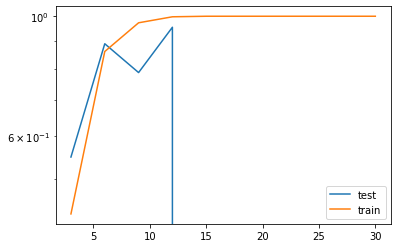

In [66]:
plt.semilogy(degres, [m.score_test() for m in modeles], label="test")
plt.semilogy(degres, [m.score_train() for m in modeles], label="train")
plt.legend()

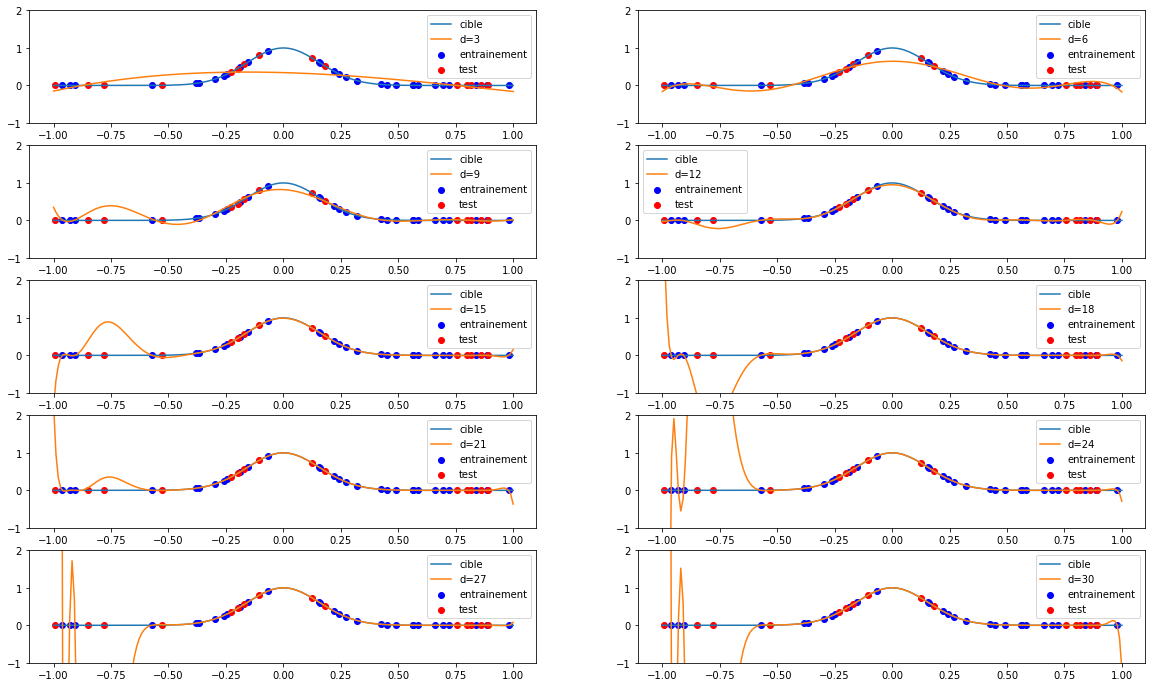

In [67]:
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(20,12))
for m, ax in zip(modeles, axs.flatten()):
    ech.affichage(ax)
    m.affichage(ax)
    ax.set_ylim(-1,2)
    ax.legend()